In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [3]:
wine_data = pd.read_csv("datasets/wine/wine_test.csv")
wine = wine_data.drop("Cultivator", axis=1) # drop labels for training set
wine_targets = wine_data["Cultivator"].copy()
wine.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
1,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
2,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
3,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
4,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630


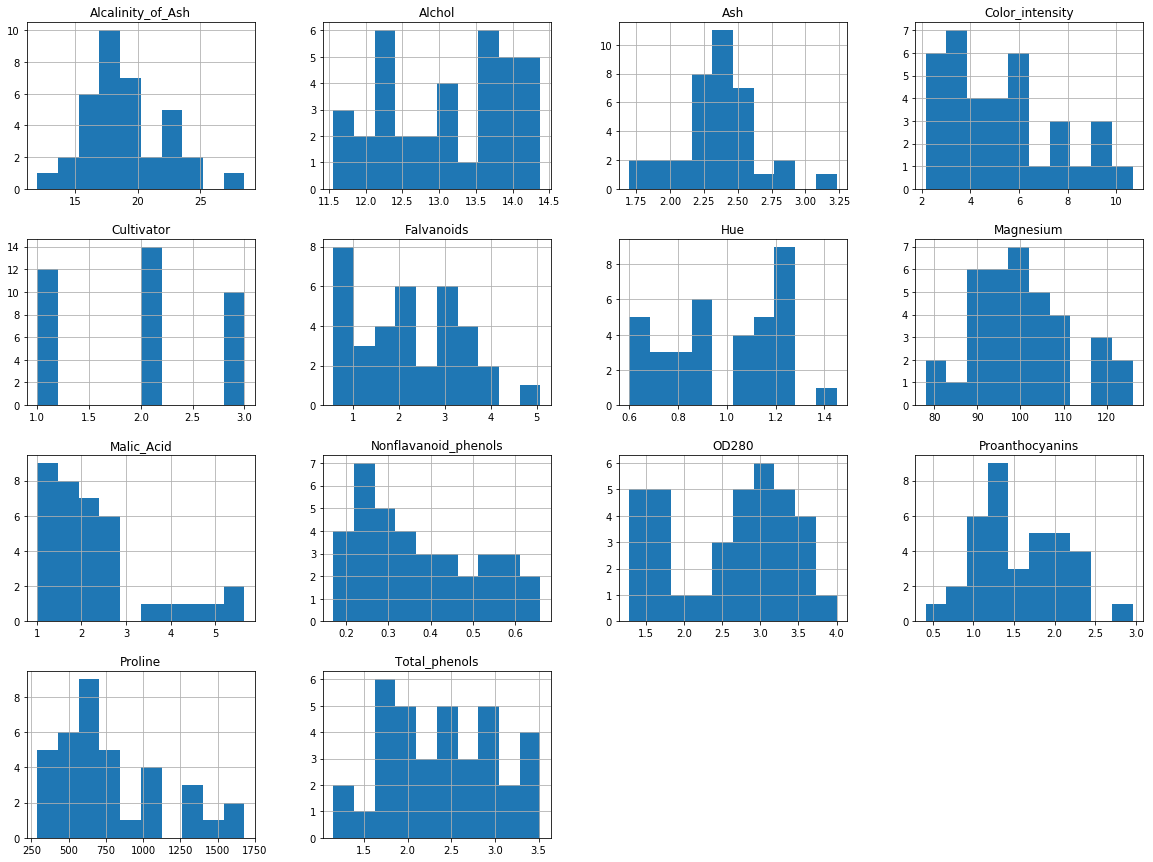

In [4]:
wine_data.hist(bins=10, figsize=(20,15))
plt.show()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

wine_num = wine_data.head().drop('Cultivator', axis=1)
num_attribs = list(wine_num)
pprint(num_attribs)
cat_attribs = ["Cultivator"]

# Replace any missing values with the median value
# Nomalize all the data
# This is all done on the numeric data so:
# housing_num = housing.drop('ocean_proximity', axis=1)
# num_attribs = list(housing_num)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('nomalize', MinMaxScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
    ])

['Alchol',
 'Malic_Acid',
 'Ash',
 'Alcalinity_of_Ash',
 'Magnesium',
 'Total_phenols',
 'Falvanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280',
 'Proline']


In [6]:
wine_prepared = full_pipeline.fit_transform(wine_data)

In [7]:
wine_prepared[0]

array([0.90070922, 0.24784483, 0.39215686, 0.36363636, 0.5625    ,
       0.75949367, 0.60888889, 0.10204082, 0.77254902, 0.42203986,
       0.76470588, 0.69372694, 0.87769784, 1.        , 0.        ,
       0.        ])

In [11]:
np.savetxt("datasets/wine/wine_test_array.csv", wine_prepared, delimiter=",")

In [9]:
np.savetxt("datasets/housing/wine_test_target_array.csv", wine_targets, delimiter=",")

In [10]:
print(num_attribs)

with open("datasets/wine/wine_atribute_lable_list.csv", 'w') as file_handler:
    for item in num_attribs:
        file_handler.write("{},".format(item))    

['Alchol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium', 'Total_phenols', 'Falvanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline']
